# Data
This notebook is exploring the United States Anti-Doping Association (USADA) data regarding sanctioned athletes obtained on their official website (https://www.usada.org/news/sanctions/)

This data only encapsulates athletes representing the US and international athletes that got sanctioned when they were tested by USADA, which USADA is allowed to do when an athlete is on the US soil.


# Terminology

**Whereabouts** :  Certain athletes, usually the best ones in their respective sports are required to update their whereabouts for out-of-competition testing. This means that they have to provide a 1 hour window every day during which they can get tested at the location they provided. If the athlete is not present during the alloted time at that location, that is considered a whereabouts failure. If 3 whereabouts failures ocurr for a single athlete in a calendar year, the athlete will be sanctioned.

**Refusing to leave a sample:**  If an athlete ever denies leaving a urine/blood sample when asked to by an accredited anti-doping official, it  will results in the athlete getting a suspension.

**Name Removal:**  Names are removed from this data set 10 years after the sanction ends. Names are also removed for “No Fault or Negligence” case resolutions 30 days after the resolution is posted. While the name is removed, all other sanction data remains in the sanction list.

# Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read in the data

df = pd.read_csv('/content/usada_sanctions.csv')

In [6]:
df.head(50)

,athlete,sport,substance_or_reason,sanction_terms,sanction_announced
0,"James, Daniel",Mixed Martial Arts,Letrozole,10-Month Suspension,09/17/2024
1,"Milani, Sydney",Bobsled,Ostarine,1-Year Suspension; Loss of Results,09/17/2024
2,"Bueno, Yatan",Brazilian Jiu-Jitsu,19-Norandrosterone,3-Year Suspension; Loss of Results,09/10/2024
3,"Silva, Fellipe Andrew Leandro",Brazilian Jiu-Jitsu,Clomiphene,2-Year Suspension; Loss of Results,09/06/2024
4,"Smith, Michael",Snowboarding,Methasterone; Methenolone; Ostarine; Drostanol...,3-Year Suspension; Loss of Results,09/06/2024
5,"Ivanov, Blagoy",Mixed Martial Arts,Androgenic Anabolic Steroid,22-Month Suspension,09/04/2024
6,"Lute, Kamryn",Speedskating,Non-Analytical: Use (BPC-157),1-Year Suspension,08/22/2024
7,"Cooper, Cary",Track and Field,Non-Analytical: Refusal to Submit to Sample Co...,2-Year Suspension; Loss of Results,08/12/2024
8,"Cappelozza, Bruno",Mixed Martial Arts,Clomiphene,1-Year Suspension,08/12/2024
9,"Maynard, Johnny",Track and Field,"RAD140; hydrochlorothiazide; 1,3-dimethylbutyl...",3-Year Suspension; Loss of Results,08/07/2024


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   athlete              975 non-null    object
 1   sport                975 non-null    object
 2   substance_or_reason  975 non-null    object
 3   sanction_terms       975 non-null    object
 4   sanction_announced   647 non-null    object
dtypes: object(5)
memory usage: 38.2+ KB


In [8]:
df.describe()

,athlete,sport,substance_or_reason,sanction_terms,sanction_announced
count,975,975,975,975,647
unique,613,89,337,165,598
top,*Name Removed,Track and Field,Cannabinoids,2-Year Suspension - Loss of Results,03/08/2023
freq,328,181,90,166,5


In [9]:
df.shape

(975, 5)

In [10]:
# Clean the date --> 'sanction_announced' column
# And convert 'sanction_announced' column to datetime format


def clean_date(date_str):
    # If the string contains 'Original:', split and keep the updated date
    if isinstance(date_str, str) and 'Original:' in date_str:
        parts = date_str.split(';')
        if len(parts) > 1:  # Check if there is an updated date
            return parts[1].split(':')[-1].strip()  # Get the updated date
        else:
            return parts[0].split(':')[-1].strip()  # If no update, keep the original date
    else:
        return date_str


# Apply the function to the column
df['sanction_announced_clean'] = df['sanction_announced'].apply(clean_date)

# Convert the new column to datetime format
df['sanction_announced_clean'] = pd.to_datetime(df['sanction_announced_clean'], errors='coerce')

In [11]:
# Remove the rows where the sanction was revoked

df = df[df['sanction_terms'] != 'No Fault or Negligence']

In [12]:
df.shape

(946, 6)

In [13]:
# Check how many sports are present in the data set

df['sport'].nunique(0)

86

In [14]:
# Check the top 10 sports in the data set

df['sport'].value_counts().head(10)

,count
sport,
Cycling,176
Track and Field,175
Weightlifting,146
Mixed Martial Arts,139
Swimming,27
Wrestling,22
Brazilian Jiu-Jitsu,17
Paralympic Track and Field,17
Triathlon,15


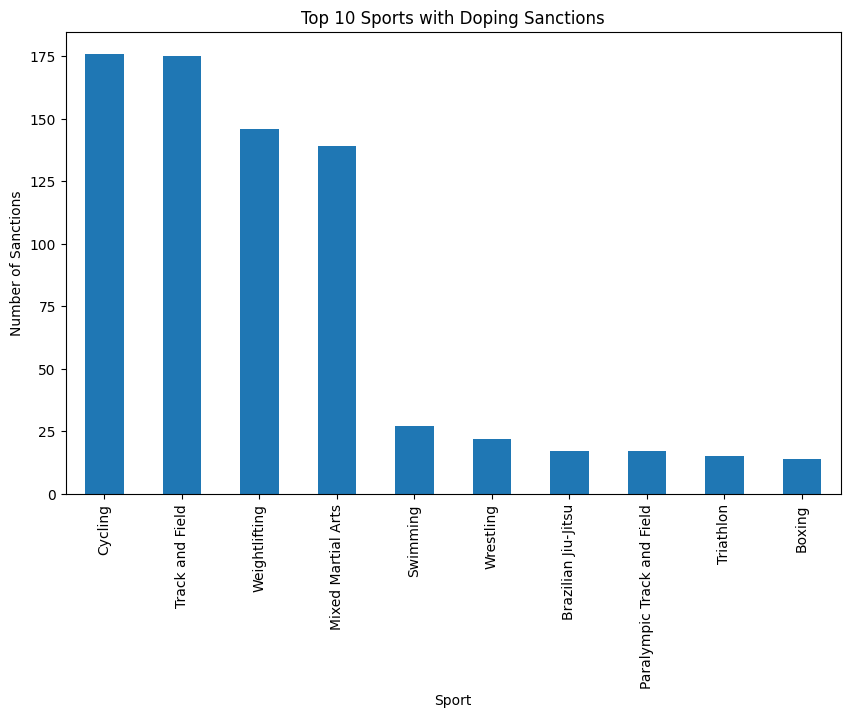

In [15]:
# Distribution of Sanctions by Sport

df['sport'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Sports with Doping Sanctions')
plt.xlabel('Sport')
plt.ylabel('Number of Sanctions')
plt.show()

**Insight**: We have 89 different sports in the data set. However the top 4 sports dominate the data set and those are: Track and Field, Cycling, Weightlifting and Mixed Martial Arts


In [16]:
#Check for the most abused substance/most common reason for suspension

df['substance_or_reason'].value_counts()

,count
substance_or_reason,
Cannabinoids,90
Androgenic Anabolic Steroid,62
Non-Analytical: Refusal to Submit to Sample Collection,54
Ostarine,37
Non-Analytical: 3 Whereabouts Failures,26
...,...
Trenbolone; Clomiphene,1
Drostanolone; Metandienone,1
Boldenone; Tamoxifen,1


**Insight**: Interestigly, cannabinoids seem to be the most common reason for suspensions in this dataset

In [17]:
# Rename all the rows in the 'substance_or_reason' column that contains
# 'Testosterone' and 'Stanozol' to 'Androgenic Anabolic Steroid' as they both belong in
# that category and it might give us a better picture of what the most abused
# substance is

df_anabolic = df.copy()
df_anabolic.loc[df_anabolic['substance_or_reason'].str.contains('Testosterone', na=False), 'substance_or_reason'] = 'Androgenic Anabolic Steroid'
df_anabolic.loc[df_anabolic['substance_or_reason'].str.contains('Stanozolol', na=False), 'substance_or_reason'] = 'Androgenic Anabolic Steroid'



In [18]:
df_anabolic['substance_or_reason'].value_counts()


,count
substance_or_reason,
Androgenic Anabolic Steroid,123
Cannabinoids,90
Non-Analytical: Refusal to Submit to Sample Collection,54
Ostarine,37
Non-Analytical: 3 Whereabouts Failures,26
...,...
Heptaminol,1
Trenbolone; Clomiphene,1
Drostanolone; Metandienone,1


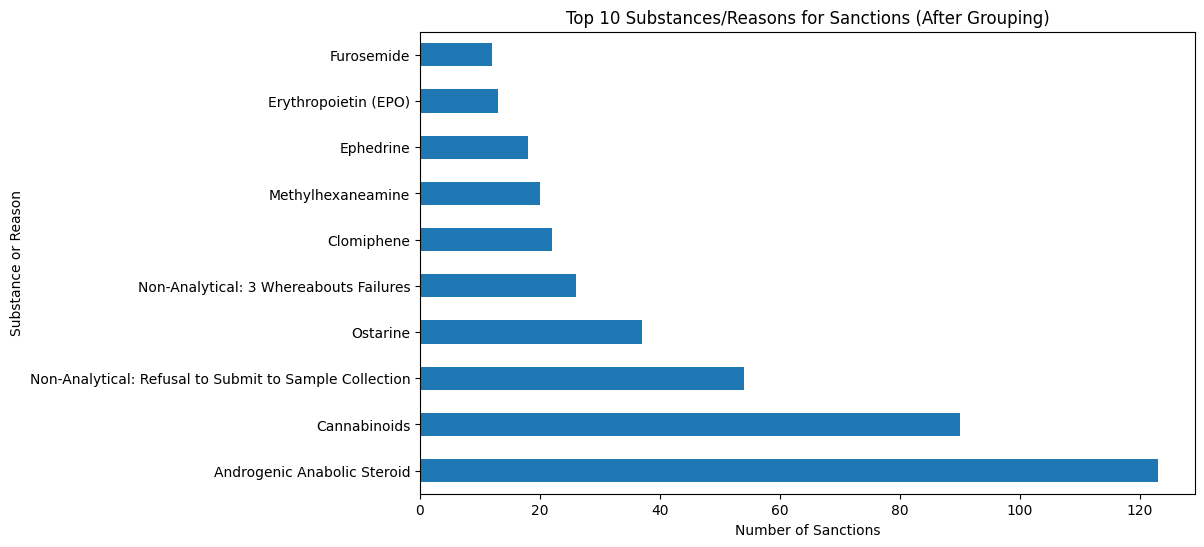

In [19]:
# Most Common Substances or Reasons for Sanctions

df_anabolic['substance_or_reason'].value_counts().head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Substances/Reasons for Sanctions (After Grouping)')
plt.xlabel('Number of Sanctions')
plt.ylabel('Substance or Reason')
plt.show()

**Insight**: Due to the fact that testoserone and stanozol are androgenic anabolic steroids I renamed all of the rows that contained the word 'Testosterone' and 'Stanozol' with 'Androgenic Anabolic Steroid' in the `substance_or_reason` column. That resulted in Androgenic Anabolic Steroid becoming the most common reason for suspensions in this dataset.

In [20]:
df['sport'].value_counts()

,count
sport,
Cycling,176
Track and Field,175
Weightlifting,146
Mixed Martial Arts,139
Swimming,27
...,...
Brazilian Jiu-Jitsu - Athlete Support Personnel,1
Paralympic Table Tennis,1
Tennis,1


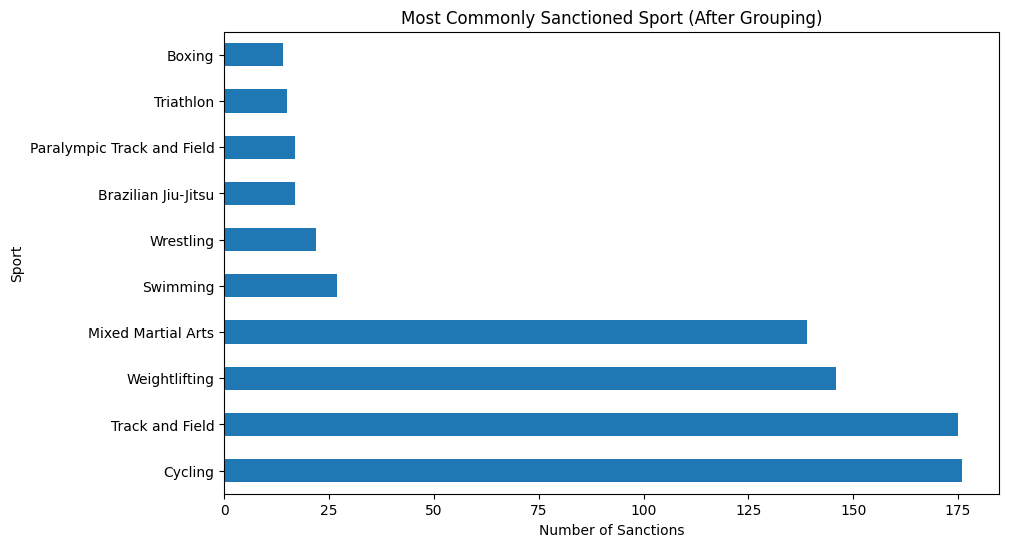

In [21]:
top_sports = df_anabolic['sport'].value_counts().head(10)
top_sports.plot(kind='barh', figsize=(10, 6), title='Most Commonly Sanctioned Sport (After Grouping)')
plt.xlabel('Number of Sanctions')
plt.ylabel('Sport')
plt.show()

**Insight:** In this data cyclists are the most sanctioned athletes, followed closely by track & field athletes.

In [22]:
df_anabolic.to_excel('cleaned_usada_sanctions.xlsx', index=False)


**Insight:** Just in this dataset alone we have 35 athletes that have been sanctioned twice. In the world of sports even just having one positive test can result in major issues and has the potential to tarnsih one's reputation and thereby diminish their financial and athletic sucess.

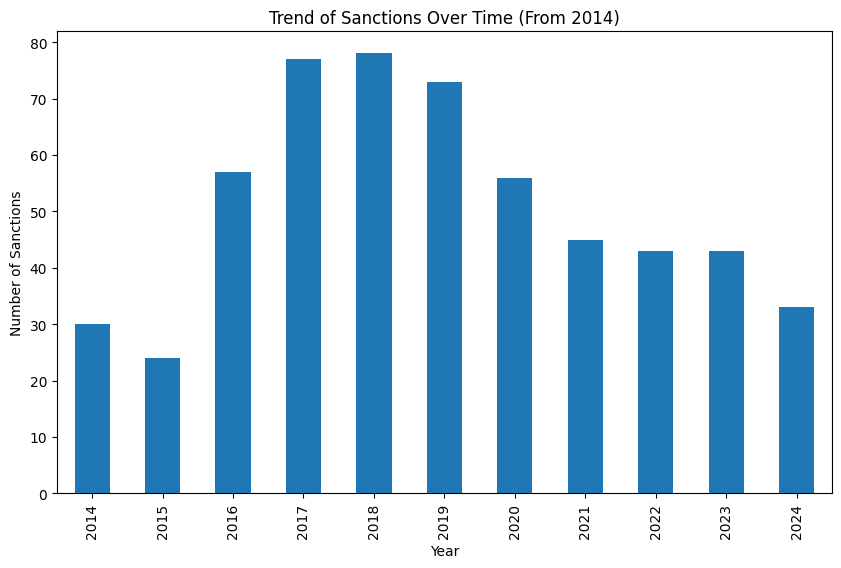

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'sanction_announced' column to datetime, handling errors
df_anabolic['sanction_announced'] = pd.to_datetime(df_anabolic['sanction_announced'], errors='coerce')

# Filter data for sanctions starting from 2014
df_anabolic_2014_onward = df_anabolic[df_anabolic['sanction_announced'].dt.year >= 2014]

# Group by year and count the number of sanctions for each year
sanctions_per_year = df_anabolic_2014_onward.groupby(df_anabolic_2014_onward['sanction_announced'].dt.year).size()

# Plot the trend
sanctions_per_year.plot(kind='bar', figsize=(10, 6), title='Trend of Sanctions Over Time (From 2014)')
plt.xlabel('Year')
plt.ylabel('Number of Sanctions')
plt.show()
